Data Preprocessing

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency


In [11]:
df = pd.read_csv("SpotifyData.csv", encoding="latin1")

display(df)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [13]:
# Convert Objects to Numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [14]:
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [15]:
# Imputing missing values
df['key'].fillna('C', inplace=True)
numeric_cols_to_fill = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

for col in numeric_cols_to_fill:
    median_val = df[col].median()
    
    df[col].fillna(median_val, inplace=True)

C:\Users\Luna Luna\AppData\Local\Temp\ipykernel_23680\72228581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna('C', inplace=True)
C:\Users\Luna Luna\AppData\Local\Temp\ipykernel_23680\72228581.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [16]:
# Final check
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

Basic Data Exploration and summary statistic

First method: Hypothesis Test (T-Test)
1. This test will determine if there is a statistically significant difference in the mean danceability between "Popular" songs and "Less Popular" songs.
2. To create these two groups, first find the median value of the streams column.
- Songs with streams above the median will be classified as "Popular."
- Songs with streams at or below the median will be classified as "Less Popular."
3. Hypotheses:
-Null Hypothesis: There is no difference in the average danceability between the "Popular" and "Less Popular" groups.
-Alternative Hypothesis: There is a difference in the average danceability between the two groups.
4. If the p-value is less than 0.05, we will reject the null hypothesis and conclude that the difference in danceability is statistically significant

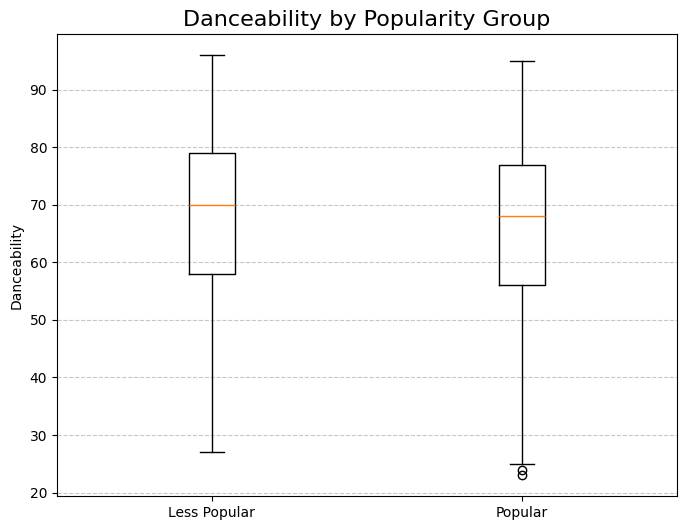

In [17]:
# Create the two groups based on median streams
median_streams = df['streams'].median()
df['popularity_group'] = ['Popular' if s > median_streams else 'Less Popular' for s in df['streams']]

popular_scores = df[df['popularity_group'] == 'Popular']['danceability_%'].dropna()
less_popular_scores = df[df['popularity_group'] == 'Less Popular']['danceability_%'].dropna()

# Create and display boxplot
plt.figure(figsize=(8, 6))
data_to_plot = [less_popular_scores, popular_scores]
plt.boxplot(data_to_plot)
plt.title('Danceability by Popularity Group', fontsize=16)
plt.ylabel('Danceability')
plt.xticks([1, 2], ['Less Popular', 'Popular']) 

plt.grid(True, axis='y', linestyle='--', alpha=0.7) # Add a grid
plt.show()

In [18]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(popular_scores, less_popular_scores)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nResult: The p-value is less than 0.05. We reject the null hypothesis.")
    print("Conclusion: There IS a statistically significant difference in danceability.")
else:
    print("\nResult: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("Conclusion: There is NO statistically significant difference in danceability.")

T-statistic: -2.2388
P-value: 0.0254

Result: The p-value is less than 0.05. We reject the null hypothesis.
Conclusion: There IS a statistically significant difference in danceability.


Second Method: Hypothesis Test (Chi-Squared Test)

1. This test will determine if there is a statistically significant relationship between the music platform (Apple vs. Spotify) and a song’s popularity category ("Popular" or "Less Popular").

2. To create these two groups, we will classify songs based on the median value of the streams column from our data:
   - Songs with streams above the median will be labeled "Popular".
   - Songs with streams at or below the median will be labeled "Less Popular".

3. Hypotheses:
   - Null Hypothesis (H₀): There is no relationship between platform type and song popularity.
   - Alternative Hypothesis (H₁): There is a relationship between platform type and song popularity.

4. If the p-value is less than 0.05, we will reject the null hypothesis and conclude that there is a statistically significant relationship between platform type and song popularity.


Contingency Table:

popularity_group  Less Popular  Popular
Platform                               
Spotify                    477      476


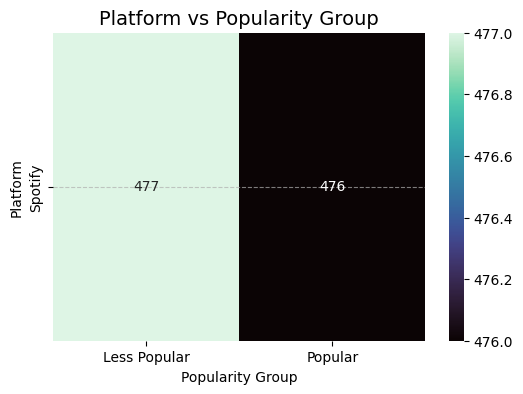

In [21]:
median_streams = df['streams'].median()
df['popularity_group'] = ['Popular' if s > median_streams else 'Less Popular' for s in df['streams']]

df['Platform'] = df.apply(
    lambda row: 'Spotify' if row['in_spotify_playlists'] > row['in_apple_playlists'] else 'Apple Music',
    axis=1
)

contingency_table = pd.crosstab(df['Platform'], df['popularity_group'])
print("Contingency Table:\n")
print(contingency_table)

plt.figure(figsize=(6,4))
sns.heatmap(contingency_table, annot=True, cmap="mako", fmt="d")
plt.title("Platform vs Popularity Group", fontsize=14)
plt.xlabel("Popularity Group")
plt.ylabel("Platform")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("\nResult: P-value < 0.05 → Reject the null hypothesis.")
    print("Conclusion: There is a significant relationship between platform and popularity.")
else:
    print("\nResult: P-value ≥ 0.05 → Fail to reject the null hypothesis.")
    print("Conclusion: There is no significant relationship between platform and popularity.")


Chi-Squared Statistic: 0.0000
Degrees of Freedom: 0
P-Value: 1.0000

Result: P-value ≥ 0.05 → Fail to reject the null hypothesis.
Conclusion: There is no significant relationship between platform and popularity.
